In [1]:
import matplotlib, csv, pandas
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
%matplotlib inline

In [2]:
def get_ax(figsize=(15, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    return ax

In [4]:
all_data = pandas.read_csv(r"C:\Users\tente\Documents\CS638\Madison crashes 1998 - July 2019.csv")
dates = all_data['ACCDDATE']
streets = all_data[['ONSTR','ATSTR']]
all_data

,DOCTNMBR,ACCDDATE,NTFYHOUR,REGION,COUNTY,MUNICIPALITY,MUNITYPE,ONHWYRP,ONHWYDIR,ONHWY,...,POSTSPD2,AGE2,SEX2,INJSVR2,SAFETY2,DRVRPC2,STNM21,STNM22,WISLR_LATDECDG,WISLR_LONDECDG
0,7314633,01/21/2002,4,SW,DANE,MADISON,C,2.0,E,NaN,...,25.0,0.0,N,,NaN,FVC,,,46.720724,-92.097331
1,8299574,01/07/2002,15,SW,DANE,MADISON,C,10.0,E,NaN,...,0.0,0.0,N,,NaN,NaN,,,44.225423,-88.444019
2,7364679,06/19/2002,15,SW,DANE,MADISON,C,10.0,E,NaN,...,25.0,20.0,M,,SH/LP,NaN,343.44 1 A,,44.108389,-87.670267
3,9BBDMB6,05/03/2009,1,SW,DANE,MADISON,C,12.0,E,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9BG0RZB,11/25/2012,0,SW,DANE,MADISON,C,12.0,E,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125573,9B8CW4D,06/15/2016,20,SW,DANE,MADISON,C,NaN,NaN,NaN,...,35.0,0.0,N,,NaN,NaN,,,43.056964,-89.513456
125574,5988688,01/29/1996,17,SW,DANE,MADISON,C,NaN,NaN,NaN,...,25.0,57.0,M,,SH/LP,FVC,,,NaN,NaN
125575,9BBBF61,08/10/2016,7,SW,DANE,MADISON,C,NaN,NaN,NaN,...,25.0,0.0,N,,NaN,NaN,,,43.065287,-89.437207
125576,6684284,08/01/1999,19,SW,DANE,MADISON,C,NaN,NaN,NaN,...,25.0,51.0,M,,SH/LP,DC,346.63 1 A,,NaN,NaN


In [4]:
date_dict = {}
for date in dates:
    if date not in date_dict:
        date_dict[date] = 1
    else:
        date_dict[date] += 1
date_df = DataFrame(date_dict, index = ["number of crashes"]).transpose().sort_values(by = ['number of crashes'], ascending = False)
#len(date_dict)

In [5]:
# kinda boring, long body
#date_df.plot(figsize=(10, 4))
#plt.title('Accidents per day')

In [6]:
#streets

In [7]:
#tuple(streets.iloc[0])

In [8]:
street_dict = {}
i = 0
while i < len(streets):
    if tuple(streets.iloc[i]) not in street_dict:
        street_dict[tuple(streets.iloc[i])] = 1
        #print(i)
    else:
        street_dict[tuple(streets.iloc[i])] += 1
        #print(i)
    i += 1

In [9]:
len(street_dict)

22324

In [10]:
streets_df = DataFrame.from_dict(street_dict, orient='index', columns=['Number of Crashes'])
streets_df = streets_df.sort_values(by=['Number of Crashes'], ascending=False)
streets_df = streets_df.tail(-1).rename_axis('Intersection')
#streets_df.head(5)

In [11]:
# Long tail as expected
#streets_df.plot(figsize=(10, 4))
#plt.title('Accidents per intersection')
#plt.xticks(rotation = 'vertical')

In [12]:
times = all_data['NTFYHOUR']
#times.head(10)

In [13]:
times_dict = {}
for time in times:
    if time not in times_dict:
        times_dict[time] = 1
    else:
        times_dict[time] += 1
# time '24' should be counted as '0'
times_dict.pop(24)
times_dict[0] += 4

In [5]:
injtime = all_data[['NTFYHOUR', 'TOTINJ', 'TOTFATL']]

In [15]:
it_dict = {}
while len(it_dict) < 25:
    for time in injtime['NTFYHOUR']:
        if time not in it_dict:
            it_dict[time] = 0
for index, row in injtime.iterrows():
    it_dict[row[0]] += row[1]
#it_dict

In [16]:
ft_dict = {}
while len(ft_dict) < 25:
    for time in injtime['NTFYHOUR']:
        if time not in ft_dict:
            ft_dict[time] = 0
for index, row in injtime.iterrows():
    ft_dict[row[0]] += row[2]

In [6]:
# time '24' should be counted as '0'
ft_dict.pop(24)
it_dict.pop(24)

NameError: name 'ft_dict' is not defined

In [18]:
times_df = DataFrame.from_dict(times_dict, orient='index', columns=['Number of Crashes'])
times_df = times_df.sort_values(by=['Number of Crashes'], ascending=False)
times_df = times_df.rename_axis('Hour')
times_df1 = times_df.sort_values(by=['Hour'])
it_df = DataFrame.from_dict(it_dict, orient='index', columns=['Number of Injuries'])
it_df = it_df.rename_axis('Hour')
it_df = it_df.sort_values(by=['Hour'])
ft_df = DataFrame.from_dict(ft_dict, orient='index', columns=['Number of Deaths'])
ft_df = ft_df.rename_axis('Hour')
ft_df = ft_df.sort_values(by=['Hour'])

In [19]:
times_y = times_df1['Number of Crashes'].sort_values(ascending=False)
times_y_lst = [times_y.iloc[0]]
i = 0
while i < len(times_y):
    if abs(times_y.iloc[i] - times_y_lst[-1]) >= 350:
        times_y_lst.append(times_y.iloc[i])
    i += 1

In [20]:
it_ylst = it_df['Number of Injuries'].sort_values(ascending=False)
ft_ylst = ft_df['Number of Deaths'].sort_values(ascending=False)

In [21]:
dates = all_data['ACCDDATE']

In [22]:
years_dict = {}
for date in dates:
    if int(date[-4:]) not in years_dict:
        years_dict[int(date[-4:])] = 1
    else:
        years_dict[int(date[-4:])] += 1

In [23]:
years_df = DataFrame.from_dict(years_dict, orient='index', columns=['Number of Crashes'])
years_df = years_df.rename_axis('Year').sort_values(by=['Year'])

In [26]:
months_dict = {}
for date in dates:
    if int(date[:2]) not in months_dict:
        months_dict[int(date[:2])] = 1
    else:
        months_dict[int(date[:2])] += 1

In [27]:
months_df = DataFrame.from_dict(months_dict, orient='index', columns=['Number of Crashes'])
months_df = months_df.rename_axis('Month').sort_values(by=['Month'])

Text(0.5, 1.0, 'Total Crashes per Year Chronologically (Discrete)')

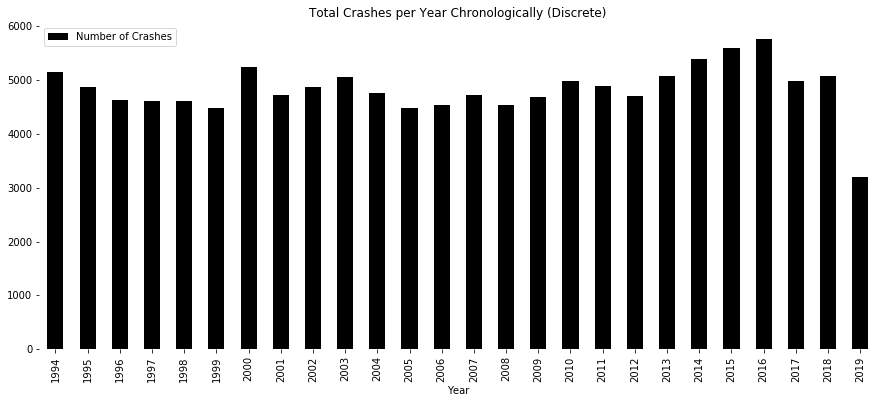

In [24]:
# ~ constant
ax = get_ax()
years_df.plot.bar(ax=ax, color='0')
plt.title('Total Crashes per Year Chronologically (Discrete)')

Text(0.5, 1.0, 'Total Crashes per Year Chronologically (Continuous)')

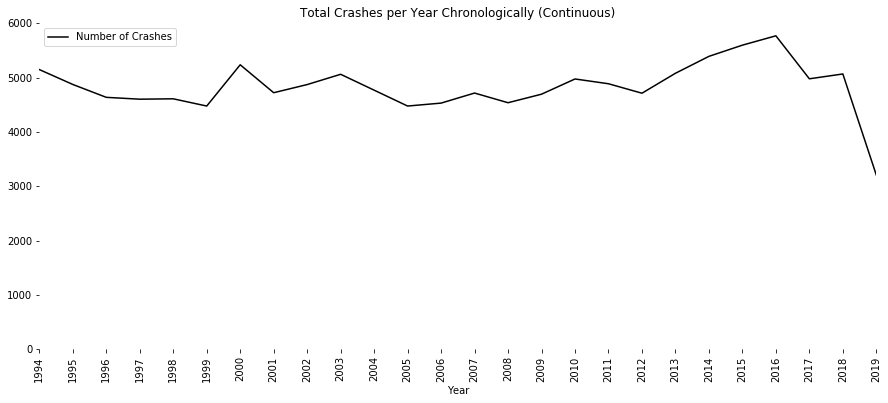

In [25]:
ax = get_ax()
years_df.plot(ax=ax, color='0', xticks=years_df.index).set_ylim(0, 6000)
plt.xticks(rotation = 'vertical')
plt.title('Total Crashes per Year Chronologically (Continuous)')

Text(0.5, 1.0, 'Total Crashes per Month Chronologically')

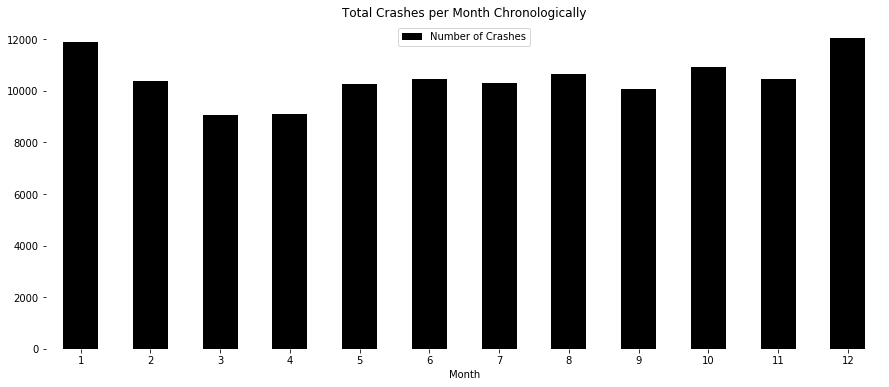

In [28]:
ax = get_ax()
months_df.plot.bar(ax=ax, color='0')
plt.xticks(rotation = 'horizontal')
plt.title('Total Crashes per Month Chronologically')

Text(0.5, 1.0, 'Total Crashes per Hour Sorted by Number of Crashes')

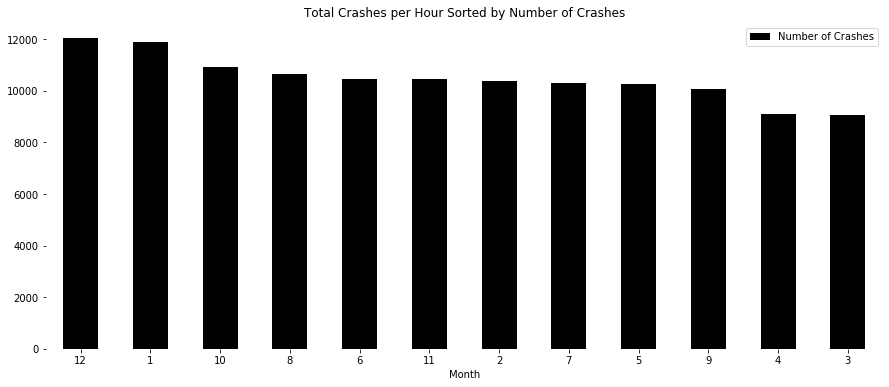

In [29]:
ax = get_ax()
months1_df = months_df.sort_values(by=['Number of Crashes'], ascending=False)
months1_df.plot.bar(ax=ax, color='0')
plt.xticks(rotation = 'horizontal')
plt.title('Total Crashes per Hour Sorted by Number of Crashes')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

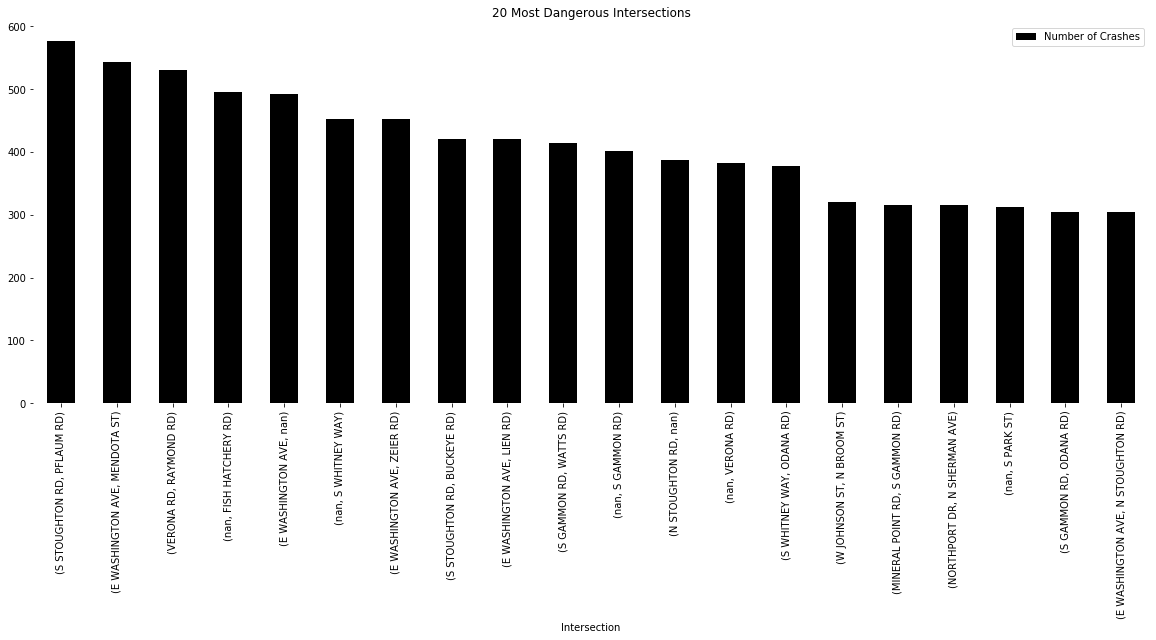

In [30]:
# Drop offs after 1st 3rd 5th and 14th most
hnum = 20
ax = get_ax()
streets_df.head(hnum).plot.bar(ax=ax, color = '0', figsize=(20, 7))
plt.title(str(hnum) + ' Most Dangerous Intersectiondds')
plt.xticks(rotation = 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

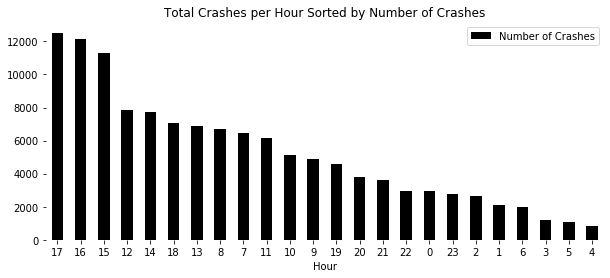

In [31]:
#surprised that morning rush hour is less dagerous than lunchtime
ax = get_ax((10, 4))
times_df.plot.bar(ax=ax, color = '0')
plt.title('Total Crashes per Hour Sorted by Number of Crashes')
plt.xticks(rotation = 'horizontal')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

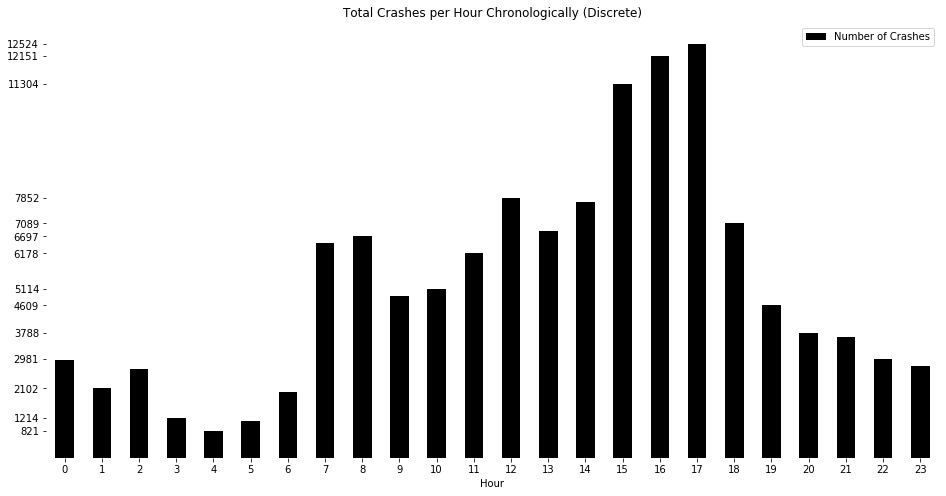

In [32]:
#discrete vs cts time
ax = get_ax((16, 8))
times_df1.plot.bar(ax=ax, color='0', yticks = times_y_lst)
plt.title('Total Crashes per Hour Chronologically (Discrete)')
plt.xticks(rotation = 'horizontal')

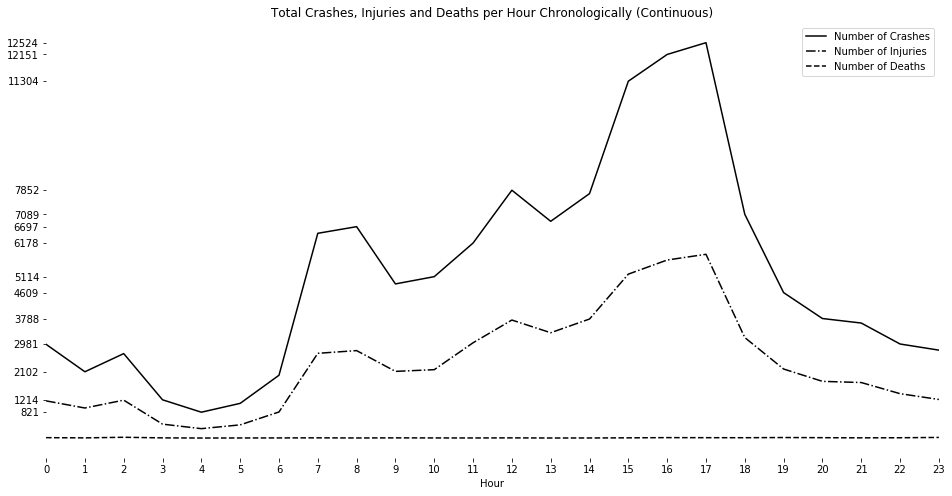

In [33]:
ax = get_ax((16, 8))
times_df1.plot(ax=ax, color='0', xticks = times_df1.index, yticks = times_y_lst)
plt.title('Total Crashes, Injuries and Deaths per Hour Chronologically (Continuous)')
it_df.plot(ax=ax, color='0', style='-.')
ft_df.plot(ax=ax, color='0', style='--')